In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,NaN,7.0
2,1.0,57.0,2,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	2
int64		column 3	0
float64		column 4	2
float64		column 5	1
float64		column 6	2
float64		column 7	2
float64		column 8	2
float64		column 9	1
float64		column 10	2
float64		column 11	1
float64		column 12	2
float64		column 13	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,266.000000,268.000000,270.000000,268.000000,269.00000,268.000000,268.000000,268.000000,269.000000,268.000000,269.000000,268.000000,267.000000
mean,0.672932,54.447761,3.174074,131.186567,249.72119,0.149254,1.014925,149.660448,0.330855,1.050373,1.583643,0.664179,4.704120
std,0.470027,9.087232,0.950090,17.832625,51.77254,0.357005,0.998014,23.235329,0.471398,1.146220,0.615011,0.935717,1.944363
min,0.000000,29.000000,1.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.00000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.00000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.00000,0.000000,2.000000,166.250000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

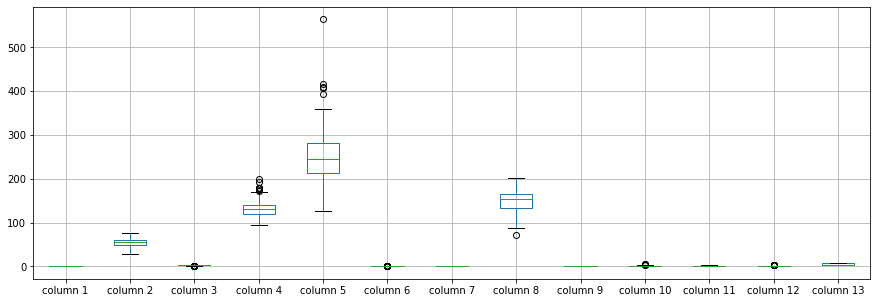

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.672932
column 2      54.447761
column 3       3.174074
column 4     131.186567
column 5     249.721190
column 6       0.149254
column 7       1.014925
column 8     149.660448
column 9       0.330855
column 10      1.050373
column 11      1.583643
column 12      0.664179
column 13      4.704120
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.091226,0.037141,-0.052494,-0.200078,0.045767,0.037740,-0.075673,0.175648,0.100654,0.050758,0.078685,0.399460
column 2,-0.091226,1.000000,0.097235,0.265585,0.215113,0.127583,0.149188,-0.397119,0.096800,0.195915,0.166903,0.355658,0.090936
column 3,0.037141,0.097235,1.000000,-0.046005,0.088600,-0.099596,0.068384,-0.316615,0.353026,0.171513,0.135015,0.220458,0.266306
column 4,-0.052494,0.265585,-0.046005,1.000000,0.164119,0.162356,0.131883,-0.038614,0.088132,0.218643,0.147518,0.064679,0.135537
column 5,-0.200078,0.215113,0.088600,0.164119,1.000000,0.031607,0.171916,-0.020357,0.076047,0.027363,-0.003882,0.147783,0.029547
column 6,0.045767,0.127583,-0.099596,0.162356,0.031607,1.000000,0.057000,0.027059,-0.004097,-0.027900,0.042373,0.126265,0.045156
column 7,0.037740,0.149188,0.068384,0.131883,0.171916,0.057000,1.000000,-0.067475,0.090806,0.110469,0.159533,0.115595,0.016414
column 8,-0.075673,-0.397119,-0.316615,-0.038614,-0.020357,0.027059,-0.067475,1.000000,-0.379137,-0.345896,-0.383638,-0.250958,-0.243425
column 9,0.175648,0.096800,0.353026,0.088132,0.076047,-0.004097,0.090806,-0.379137,1.000000,0.277380,0.255713,0.139211,0.314712
column 10,0.100654,0.195915,0.171513,0.218643,0.027363,-0.027900,0.110469,-0.345896,0.277380,1.000000,0.606999,0.249688,0.323115


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+33,13+33+33,13+33+33+33,13+33+33+33+33,13+33+33+33+33+33,13+33+33+33+33,13+33+33+33,13+33+33,13+33,13], vae_layer = False, seed = 33)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 605.2374877929688
Epoch: 1 , loss: 606.5726928710938
Epoch: 2 , loss: 603.6616592407227
Epoch: 3 , loss: 606.5954246520996
Epoch: 4 , loss: 606.9103050231934
Epoch: 5 , loss: 604.606861114502
Epoch: 6 , loss: 606.3534088134766
Epoch: 7 , loss: 605.395092010498
Epoch: 8 , loss: 603.4697875976562
Epoch: 9 , loss: 606.9654769897461
Epoch: 10 , loss: 605.950855255127
Epoch: 11 , loss: 606.0445747375488
Epoch: 12 , loss: 604.8290252685547
Epoch: 13 , loss: 603.5742988586426
Epoch: 14 , loss: 606.2323799133301
Epoch: 15 , loss: 604.537483215332
Epoch: 16 , loss: 605.3353958129883
Epoch: 17 , loss: 603.4719772338867
Epoch: 18 , loss: 605.5478782653809
Epoch: 19 , loss: 607.3216171264648
Epoch: 20 , loss: 606.1482467651367
Epoch: 21 , loss: 603.6684226989746
Epoch: 22 , loss: 604.3489646911621
Epoch: 23 , loss: 604.4803047180176
Epoch: 24 , loss: 604.2025566101074
Epoch: 25 , loss: 602.8656272888184
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050796,0.0
2,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
266,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
267,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
268,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(391.13114485366197, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.07223435468800446

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.000000,3.0
1,0.000000,67.0,3,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.050796,7.0
2,1.000000,57.0,2,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.000000,7.0
3,1.000000,64.0,4,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.000000,7.0
4,0.000000,74.0,2,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,3,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.000000,7.0
266,1.000000,44.0,2,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.000000,7.0
267,0.000000,56.0,2,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.000000,3.0
268,1.000000,57.0,4,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_NN_1(imp).xlsx", index=False, header=False)